In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
from google.colab import files
uploaded = files.upload()

Saving database.csv to database.csv


In [24]:
# read data
earthquakes = pd.read_csv("database.csv")


# set seed for reproducibility
np.random.seed(0)
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01-02-1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01-04-1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01-05-1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01-08-1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01-09-1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


#The data contains Missing values
'''HANDLING MISSING VALUES'''

In [4]:
#The profile of the missing values
missing_values = earthquakes.isnull().sum()
print("MISSING VALUES")
print(missing_values)

MISSING VALUES
Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64


In [5]:
#Dropping rows and columns that contain NaN values
earthquakes.dropna(axis=0, inplace=True)
earthquakes.dropna(axis=1, inplace=True)
earthquakes.sample(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3673,10/28/1975,14:30:00,37.290167,-116.411500,Nuclear Explosion,1.30,31.61,19.0,5.67,ML,...,8.0,260.0,1.472000,99.000,2.75,CI3006257,CI,CI,CI,Reviewed
3307,11/22/1974,16:25:34,30.250000,-114.800000,Earthquake,6.00,31.61,20.0,5.55,ML,...,4.0,312.0,2.641000,99.000,3.22,CI3319062,CI,CI,CI,Reviewed
1532,03/26/1970,19:00:01,37.300500,-116.534167,Nuclear Explosion,1.20,31.61,16.0,5.54,ML,...,10.0,260.0,1.377000,99.000,0.35,CI3325031,CI,CI,CI,Reviewed
5631,09-07-1980,04:36:38,38.138333,-118.391333,Earthquake,6.00,31.61,5.0,5.52,ML,...,12.0,333.0,1.090000,8.020,0.33,CI9735242,CI,CI,CI,Reviewed
1129,12/19/1968,16:30:01,37.231500,-116.473667,Nuclear Explosion,1.40,31.61,16.0,5.52,ML,...,6.0,257.0,1.415000,99.000,1.36,CI3342181,CI,CI,CI,Reviewed
22238,05/28/2014,21:15:07,18.045000,-68.350900,Earthquake,90.00,2.00,31.0,5.80,ML,...,12.0,262.8,0.467124,2.900,0.41,PR14148004,PR,PR,PR,Reviewed
3754,01-03-1976,19:15:01,37.296500,-116.333167,Nuclear Explosion,1.50,31.61,20.0,5.84,ML,...,8.0,261.0,1.534000,99.000,0.44,CI3001652,CI,CI,CI,Reviewed
897,04/26/1968,15:00:02,37.295333,-116.455667,Nuclear Explosion,1.20,31.61,17.0,5.63,ML,...,6.0,261.0,1.438000,99.000,1.03,CI3342128,CI,CI,CI,Reviewed
3516,06/26/1975,12:30:01,37.278833,-116.368667,Nuclear Explosion,6.00,31.61,19.0,5.52,ML,...,13.0,260.0,1.504000,99.000,3.44,CI12328563,CI,CI,CI,Reviewed
5523,05/18/1980,15:32:11,46.207333,-122.188000,Earthquake,1.51,0.56,18.0,5.70,MD,...,1.0,62.0,0.008296,0.682,0.22,UW10084803,UW,UW,UW,Reviewed


In [6]:
#The data column is not parsed
'''PARSING DATES'''
# print the first few rows of the date column
print(earthquakes['Date'].head())

565     12/20/1966
897     04/26/1968
1129    12/19/1968
1380    09/16/1969
1532    03/26/1970
Name: Date, dtype: object


In [7]:
#Notice the difference in how the dtype is shown in below two cases
print(earthquakes['Date'].dtype)
print()
earthquakes['Date'].dtype

object



dtype('O')

In [8]:
import datetime
# using infer_datetime_format as the explicit format failed due to data not in consistent form
earthquakes['Parsed-Date'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True)

In [9]:
# Check the date in new column : Parsed-Date
earthquakes['Parsed-Date'].head()

565    1966-12-20
897    1968-04-26
1129   1968-12-19
1380   1969-09-16
1532   1970-03-26
Name: Parsed-Date, dtype: datetime64[ns]

In [10]:
# print sample data for Parsed-Date
earthquakes['Parsed-Date'].sample(10)

2723    1973-06-06
1129    1968-12-19
1380    1969-09-16
1532    1970-03-26
5631    1980-09-07
565     1966-12-20
3754    1976-01-03
22238   2014-05-28
3516    1975-06-26
3307    1974-11-22
Name: Parsed-Date, dtype: datetime64[ns]

In [11]:
pip install pytz

In [12]:
import pandas as pd
import pytz

# Assuming datetimes are originally in UTC
utc = pytz.UTC

# Convert the 'Parsed-Date' column to datetime format
earthquakes['Parsed-Date'] = pd.to_datetime(earthquakes['Parsed-Date'])

# Make sure the datetime column is timezone-aware (UTC)
earthquakes['Parsed-Date'] = earthquakes['Parsed-Date'].apply(lambda x: x if x.tzinfo else utc.localize(x))

# Now, use the .dt accessor to extract date components
day_of_month_earthquakes = earthquakes['Parsed-Date'].dt.day
month_of_earthquakes = earthquakes['Parsed-Date'].dt.month
year_of_earthquakes = earthquakes['Parsed-Date'].dt.year

Data Visualization

<ipython-input-13-1f23f7b96e76>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_month_earthquakes)


<Axes: xlabel='Parsed-Date', ylabel='Density'>

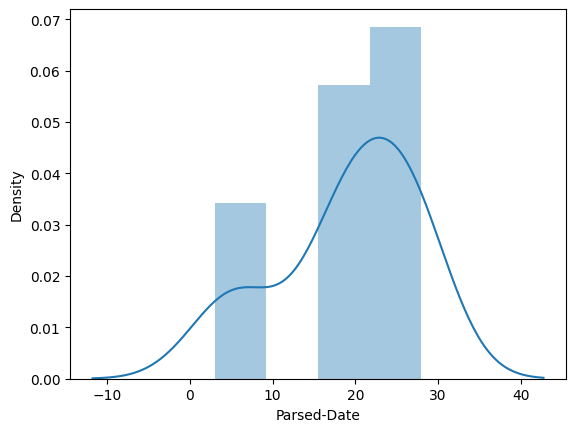

In [13]:
day_of_month_earthquakes = earthquakes['Parsed-Date'].dt.day

day_of_month_earthquakes = day_of_month_earthquakes.dropna()

sns.distplot(day_of_month_earthquakes)

In [25]:
data = pd.read_csv("database.csv")

In [26]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [15]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
565,12/20/1966,15:30:01,37.302167,-116.408333,1.2,5.62
897,04/26/1968,15:00:02,37.295333,-116.455667,1.2,5.63
1129,12/19/1968,16:30:01,37.231500,-116.473667,1.4,5.52
1380,09/16/1969,14:30:01,37.314167,-116.460667,1.2,5.82
1532,03/26/1970,19:00:01,37.300500,-116.534167,1.2,5.54


In [27]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')

In [28]:
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values

In [29]:
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Timestamp
7,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic,-156472938.0
8,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic,-156428843.0
9,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic,-156345403.0
10,-6.807,108.988,Earthquake,227.9,NaN,NaN,5.9,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM861155,ISCGEM,ISCGEM,ISCGEM,Automatic,-156308539.0
11,-2.608,125.952,Earthquake,20.0,NaN,NaN,8.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM861299,ISCGEM,ISCGEM,ISCGEM,Automatic,-155778523.0


In [30]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.10.2-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
ERROR: https://github.com/matplotlib/basemap/archive/master.zip does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [20]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 50.2 MB/s eta 0:00:00


In [31]:
from mpl_toolkits.basemap import Basemap

In [32]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

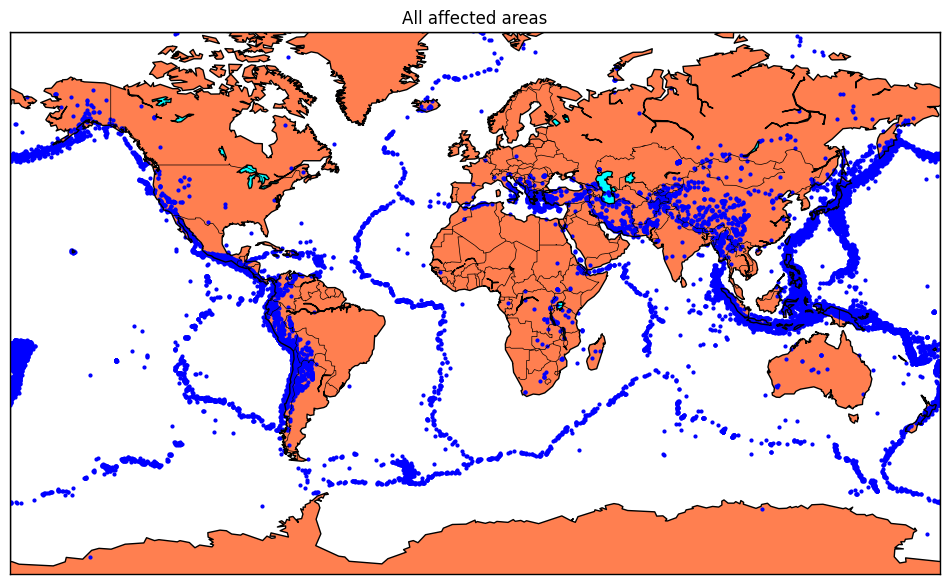

In [33]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [34]:
data = data.drop('ID', axis=1)
data.isna().sum()
null_columns = data.loc[:, data.isna().sum() > 0.66 * data.shape[0]].columns
data = data.drop(null_columns, axis=1)
data.isna().sum()
data['Root Mean Square'] = data['Root Mean Square'].fillna(data['Root Mean Square'].mean())
data = data.dropna(axis=0).reset_index(drop=True)
data.isna().sum().sum()

0

In [35]:
data

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Timestamp
0,01-02-1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,ValueError
1,01-04-1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,ValueError
2,01-05-1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,ValueError
3,01-08-1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,ValueError
4,01-09-1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,ValueError
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed,1482913332.0
23405,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed,1482916427.0
23406,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed,1482928731.0
23407,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed,1483050619.0


In [36]:
data['Month'] = data['Date'].apply(lambda x: x[0:2])
data['Year'] = data['Date'].apply(lambda x: x[-4:])

data = data.drop('Date', axis=1)

In [37]:
data['Month'] = data['Month'].astype(np.int)

<ipython-input-37-7b03c2eae7e8>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Month'] = data['Month'].astype(np.int)


In [38]:
data[data['Year'].str.contains('Z')]

,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Timestamp,Month,Year
3378,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6,MB,1.022784,US,US,US,Reviewed,ValueError,19,000Z
7510,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6,MW,1.300000,US,US,HRV,Reviewed,ValueError,19,530Z
20647,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8,MWC,1.060000,US,US,GCMT,Reviewed,ValueError,20,520Z


In [39]:
invalid_year_indices = data[data['Year'].str.contains('Z')].index

data = data.drop(invalid_year_indices, axis=0).reset_index(drop=True)

In [40]:
data['Year'] = data['Year'].astype(np.int)

<ipython-input-40-ca853ac0c7ce>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Year'] = data['Year'].astype(np.int)


In [41]:
data['Hour'] = data['Time'].apply(lambda x: np.int(x[0:2]))

data = data.drop('Time', axis=1)

<ipython-input-41-94f4012fe7b7>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Hour'] = data['Time'].apply(lambda x: np.int(x[0:2]))


In [42]:
data['Status'].unique()

array(['Automatic', 'Reviewed'], dtype=object)

In [43]:
data['Status'] = data['Status'].apply(lambda x: 1 if x == 'Reviewed' else 0)

In [44]:
numeric_columns = [column for column in data.columns if data.dtypes[column] != 'object']

In [45]:
corr = data[numeric_columns].corr()

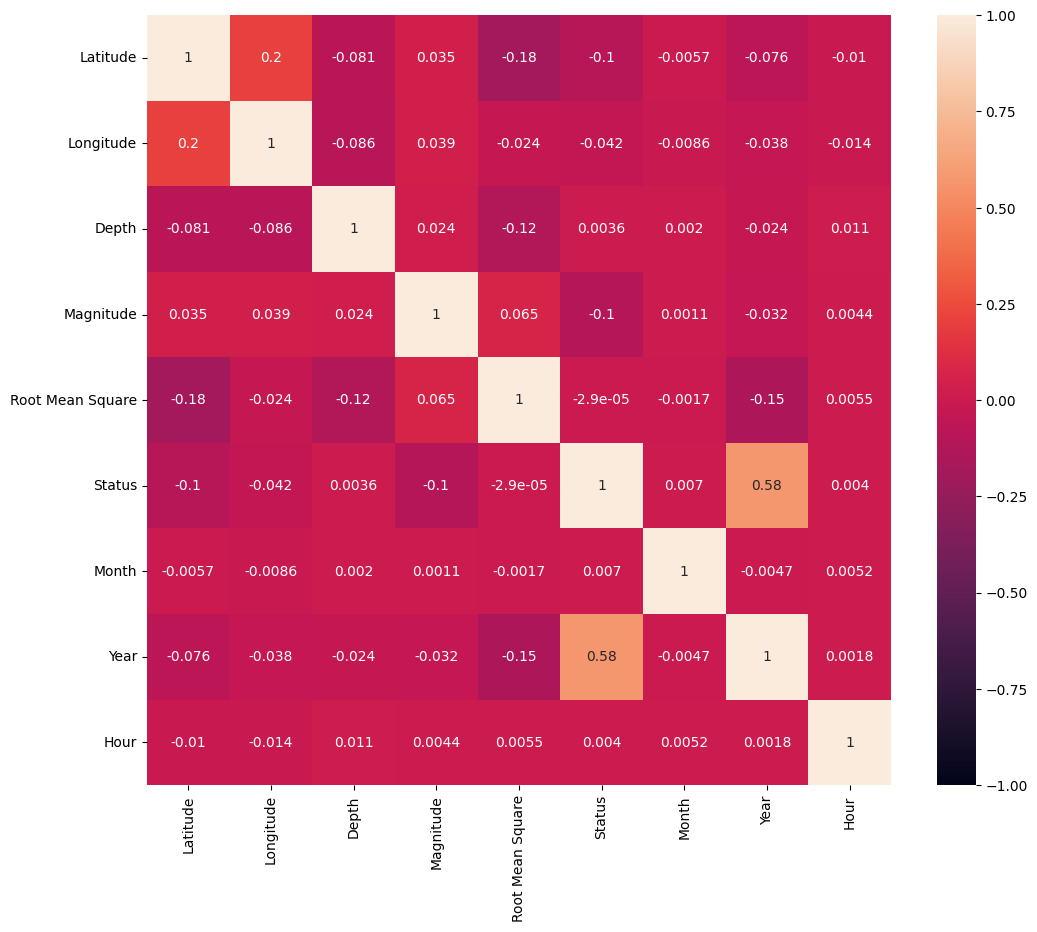

In [49]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [47]:
numeric_columns.remove('Status')

In [48]:
scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(data[numeric_columns].copy()), columns=numeric_columns)

<ipython-input-50-250db4fb0762>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
<ipython-input-50-250db4fb0762>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
<ipython-input-50-250db4fb0762>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
<ipython-input-50-250db4fb0762>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
<ipython-input-50-250db4fb0762>:

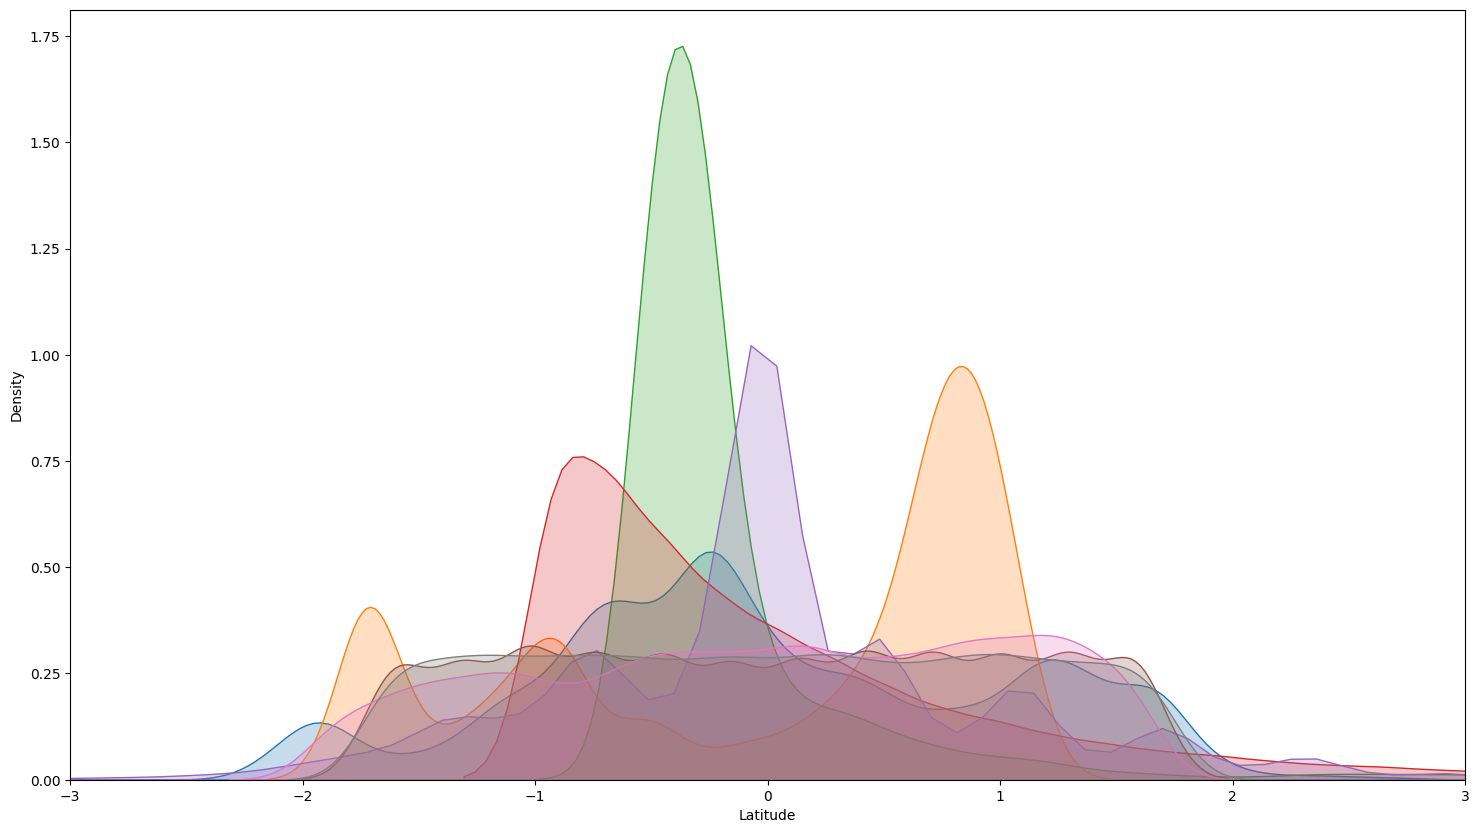

In [50]:
plt.figure(figsize=(18, 10))
for column in numeric_columns:
    sns.kdeplot(standardized_df[column], shade=True)
plt.xlim(-3, 3)
plt.show()

In [51]:
data['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [52]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [53]:
data = onehot_encode(
    data,
    ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source'],
    ['t', 'mt', 's', 'ls', 'ms']
)

Splitting and Scaling

In [100]:
data.columns

Index(['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Root Mean Square',
       'Status', 'Timestamp', 'Month', 'Year', 'Hour',
       ...
       'ms_NN', 'ms_OFFICIAL', 'ms_PAR', 'ms_PGC', 'ms_PR', 'ms_SE', 'ms_US',
       'ms_US_GCMT', 'ms_US_PGC', 'ms_UW'],
      dtype='object', length=106)

In [101]:
X = df[['Latitude', 'Longitude']]
y = df[['Depth', 'Magnitude']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(18724, 2) (4682, 2) (18724, 2) (4682, 2)


Model Training using Random Forest

In [102]:
from sklearn.ensemble import RandomForestRegressor  # For regression tasks

# Create a Random Forest Regressor (for predicting continuous values like Depth and Magnitude)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the accuracy or other regression metrics based on your problem
# For example, you can use mean squared error for regression tasks
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1119.3237526809548


In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)



Mean Absolute Error: 10.58554828131038
R-squared (R2) Score: 0.36415035808962104
